In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_sales = pd.read_csv('../data/clean_step2.csv')

In [3]:
df_sales.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,...,perc_icms,perc_tax_substitution,unit_revenue,unit_price,unit_liquid_price,unit_perc_pis_cofins,unit_perc_icms,unit_perc_tax_substitution,unit_liquid_cost,unit_markup
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.0,19.60,537.4868,978.90,1080.1933,9.25,0.0,19.60,542.7065,1.990382
1,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.0,19.60,537.4868,978.90,1080.1933,9.25,0.0,19.60,542.7065,1.990382
2,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,0.0,19.71,535.3914,976.05,1078.0979,9.25,0.0,19.71,542.7065,1.986521
3,a8ad36828898fa3f6efeb5bd19c076f2,e6762ba2ffbca07ab6cee7551caeaad5,1,1089.10,100.7418,185.147,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,17.0,0.00,260.5047,1089.10,803.2112,9.25,17.0,0.00,542.7065,1.480010
4,9cbfaac6e04ea6ed454b843c94f2c29c,e6762ba2ffbca07ab6cee7551caeaad5,1,949.00,87.7825,170.820,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,...,18.0,0.00,147.6910,949.00,690.3975,9.25,18.0,0.00,542.7065,1.272138


In [4]:
df_sales.describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999])

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,liquid_price,revenue,markup,week_number,...,perc_icms,perc_tax_substitution,unit_revenue,unit_price,unit_liquid_price,unit_perc_pis_cofins,unit_perc_icms,unit_perc_tax_substitution,unit_liquid_cost,unit_markup
count,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,...,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000,144731.000000
mean,1.050653,233.439841,19.446323,24.590919,18.274328,135.678992,207.676926,71.997934,1.602465,25.741002,...,10.347968,7.992504,66.220203,224.271591,199.946653,8.156754,10.159603,7.941057,133.726450,1.532183
std,0.405702,154.475453,15.034110,29.380116,28.044705,81.685219,143.788760,96.392161,0.682067,15.982790,...,8.950847,9.780609,63.052799,126.387220,122.373259,2.901450,8.900233,9.786256,82.225024,0.372430
min,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,5.234300,-110.874000,0.516644,0.000000,...,0.000000,0.000000,-110.874000,6.910000,5.234300,0.000000,0.000000,0.000000,1.612530,0.516644
0.01%,1.000000,6.910000,0.000000,0.000000,0.000000,4.114100,5.658100,-70.401100,0.693275,0.000000,...,0.000000,0.000000,-70.401100,6.910000,5.658100,0.000000,0.000000,0.000000,4.114100,0.693275
25%,1.000000,149.410000,10.430300,0.000000,0.000000,76.865400,127.705700,25.168500,1.233735,12.000000,...,0.000000,0.000000,25.100300,146.475000,124.810100,9.250000,0.000000,0.000000,75.957600,1.224804
50%,1.000000,194.800000,17.519500,19.880000,0.000000,117.082000,177.868400,48.025300,1.498941,24.000000,...,17.000000,0.000000,47.365200,191.280000,173.962300,9.250000,17.000000,0.000000,116.627300,1.470183
75%,1.000000,309.900000,28.618600,38.860200,30.861200,205.899700,249.576200,98.394400,1.862214,41.000000,...,18.000000,18.370000,96.219550,305.875000,244.585000,9.250000,18.000000,18.370000,205.899700,1.838350
90%,1.000000,359.910000,33.244500,61.098000,69.057300,213.438200,368.190700,158.514500,2.088913,47.000000,...,18.000000,21.620000,147.970200,359.400000,359.676000,9.250000,18.000000,21.620000,213.438200,2.035023
99%,2.000000,820.567000,70.280660,131.220000,100.815700,496.929700,729.313700,388.147500,3.562371,52.000000,...,20.000000,27.120000,273.316960,766.176000,667.943300,9.250000,20.000000,27.120000,496.929700,2.362328


## Verify the distributions

In [5]:
def summary_dist(target_col, base_col='order_id', method='count'):
    if method == 'count':
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.nunique}).reset_index()
    else:
        df_summary = df_sales[[target_col,base_col]].groupby(target_col).agg({base_col:pd.Series.sum}).reset_index()
    df_summary[base_col] = df_summary[base_col] / df_summary[base_col].sum()  * 100
    return df_summary.sort_values(base_col).tail(25)

In [6]:
df_orders_product = summary_dist('code')
df_orders_product

,code,order_id
64,5e4c14883e5a606fac56b2630da5dca7,0.771777
46,4557c7e5af70efd2e3ca2befd59ccdc3,0.807014
89,a2018dae10d736a66eea5a0a349ef9ee,0.815306
103,c254dc11afbcc091678f0ab49a02e7ad,0.858144
73,6c82ad0e791258434fd42c51409b0239,0.875417
5,0f38be2df6854b4374f06cae1bc38482,0.952111
39,40bddb00475d65eddb68e9aeb6fab0de,0.997713
121,e13f7f001fe2b1af072a3d50d3058284,1.080625
81,7da116bd1d42f3475803402e710253cf,1.162156
63,5e39201e582b1bb89cae7f650e4330c8,1.238850


In [7]:
df_orders_product.tail(10).sum()

code        d5bc9e14d090330cd07e6ccbcb3c3e4e760693745e10b0...
order_id                                              50.9069
dtype: object

* It is interesting to see that 50% of the orders are from 10 Products 

In [8]:
df_product_quantity = summary_dist('code', base_col='quantity', method='sum')
df_product_quantity

,code,quantity
64,5e4c14883e5a606fac56b2630da5dca7,0.756928
46,4557c7e5af70efd2e3ca2befd59ccdc3,0.781260
89,a2018dae10d736a66eea5a0a349ef9ee,0.806908
73,6c82ad0e791258434fd42c51409b0239,0.843077
5,0f38be2df6854b4374f06cae1bc38482,0.941721
103,c254dc11afbcc091678f0ab49a02e7ad,0.967369
39,40bddb00475d65eddb68e9aeb6fab0de,0.977891
121,e13f7f001fe2b1af072a3d50d3058284,1.087057
81,7da116bd1d42f3475803402e710253cf,1.135721
63,5e39201e582b1bb89cae7f650e4330c8,1.350765


In [9]:
df_product_quantity.tail(10).sum()

code        d5bc9e14d090330cd07e6ccbcb3c3e4e760693745e10b0...
quantity                                               50.701
dtype: object

* It is interesting to see that also 50% of  the quantity are from 10 Products 

In [10]:
df_product_revenue = summary_dist('code', base_col='revenue', method='sum')
df_product_revenue

,code,revenue
9,193628b6634713730d3c506f2da0ff58,0.853932
121,e13f7f001fe2b1af072a3d50d3058284,0.898701
77,727673fa3e457bc596532b3eb26b23a0,0.902393
119,dd1935ffd0ee2b6ec159ba7867d11e57,0.933734
31,37e2a39e829495d13b6cbb5320413e48,0.939790
5,0f38be2df6854b4374f06cae1bc38482,0.961806
46,4557c7e5af70efd2e3ca2befd59ccdc3,1.015366
82,7e3713530b46887cff58a2e2ac433ac5,1.164987
50,4ceedf57303e127d31a164c7ae5791d8,1.232384
81,7da116bd1d42f3475803402e710253cf,1.266658


In [11]:
df_product_revenue.tail(10).sum()

code       55447a73ff140176f4210347854c71f123056d85a1c911...
revenue                                              54.4592
dtype: object

* Now when we have that 3 products represent 30% of the revenue ?

## Deep dive on products

In [12]:
top_5_orders = df_orders_product.tail(5).code.values
top_5_product_revenue = df_product_revenue.tail(5).code.values
top_5_product_quantity = df_product_quantity.tail(5).code.values

selected_products = list(set(list(top_5_orders)+ list(top_5_product_revenue)+ list(top_5_product_quantity)))
selected_products

['3454ea52396a4cfd3fc37414d30c7b9c',
 '23056d85a1c9115cd021a6ad35c84aff',
 '2e35421c34fb588ba40a0c57b3971d24',
 '32ceebf3efea1d04ace4183d20d4da5b',
 '4534ea61b50410b3b6243e02b40c8cd1',
 '760693745e10b0c5e68c42214c729b0d']

In [13]:
selected_cols = ['category', 'code', 'source_channel','month', 'revenue', 'unit_price', 'unit_liquid_cost', 'unit_perc_pis_cofins', 'unit_perc_icms', 'unit_perc_tax_substitution', 'unit_markup', 'quantity', 'unit_revenue', 'week_number']

In [14]:
df_filtered_sales = df_sales[selected_cols][
    df_sales.code.isin(selected_products)]
df_filtered_sales.groupby('code').describe(percentiles=[.0001,.25, .50, .75, .90, .99, .9999]).T

code                23056d85a1c9115cd021a6ad35c84aff  \
month       count                        5146.000000   
            mean                            7.616790   
            std                             3.069658   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
week_number 75%                            43.000000   
            90%                            48.000000   
            99%                            51.000000   
            99.99%                         52.000000   
            max                            52.000000   

code                2e35421c34fb588ba40a0c57b3971d24  \
month       count                       18026.000000   
            mean                            6.294575   
            std                             3.492348   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
week_number 75%                            40.000000   
            90%                            47.000000   
            99%                            52.000000   
            99.99%                         52.000000   
            max                            52.000000   

code                32ceebf3efea1d04ace4183d20d4da5b  \
month       count                        7491.000000   
            mean                            6.323188   
            std                             3.494122   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
week_number 75%                            40.000000   
            90%                            44.000000   
            99%                            52.000000   
            99.99%                         52.000000   
            max                            52.000000   

code                3454ea52396a4cfd3fc37414d30c7b9c  \
month       count                        7509.000000   
            mean                            7.284858   
            std                             3.372807   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
week_number 75%                            42.000000   
            90%                            49.000000   
            99%                            52.000000   
            99.99%                         52.000000   
            max                            52.000000   

code                4534ea61b50410b3b6243e02b40c8cd1  \
month       count                       14205.000000   
            mean                            6.612742   
            std                             3.595978   
            min                             1.000000   
            0.01%                           1.000000   
...                                              ...   
week_number 75%                            41.000000   
            90%                            48.000000   
            99%                            52.000000   
            99.99%                         52.000000   
            max                            52.000000   

code                760693745e10b0c5e68c42214c729b0d  
month       count                        3980.000000  
            mean                            6.848744  
            std                             3.199292  
            min                             1.000000  
            0.01%                           1.000000  
...                                              ...  
week_number 75%                            40.000000  
            90%                            44.000000  
            99%                            52.000000  
            99.99%                         52.000000  
            max               

* The products are selling in orders with 1 quantity 90% of the time.
* The price deviation on 3454ea52396a4cfd3fc37414d30c7b9c and 4534ea61b50410b3b6243e02b40c8cd1 when compared to its means have a higher value than its pairs. 
* The product 4534ea61b50410b3b6243e02b40c8cd1 doesn't have to pay pis/cofins. 
* 75% of the sales for 760693745e10b0c5e68c42214c729b0d doens't do tax substitution.
* The product costs doesn't change?
* There were some sales with negative revenue (losses) 4534ea61b50410b3b6243e02b40c8cd1 and 2e35421c34fb588ba40a0c57b3971d24. 


## Season

In [15]:
def plot_season_sales(df, target_col, base_col='month', method='sum'):
    if method == 'sum':
        df = df[[base_col, target_col]].groupby(base_col).sum().reset_index()
    else: 
        df = df[[base_col, target_col]].groupby(base_col).mean().reset_index()
    return sns.lineplot(x=df[base_col], y=df[target_col])


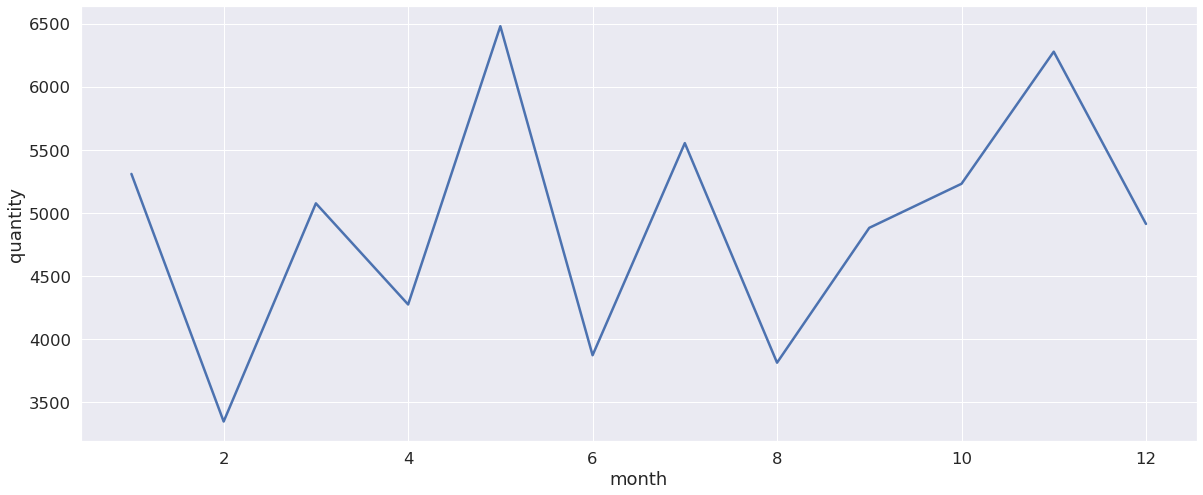

In [16]:
ax = plot_season_sales(df_filtered_sales,'quantity')
plt.show()

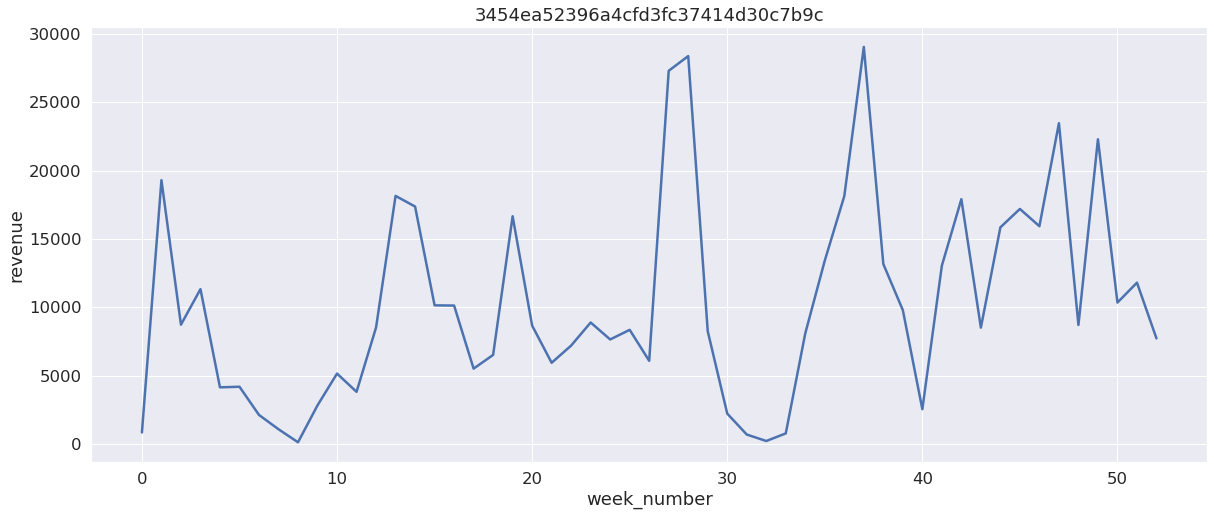

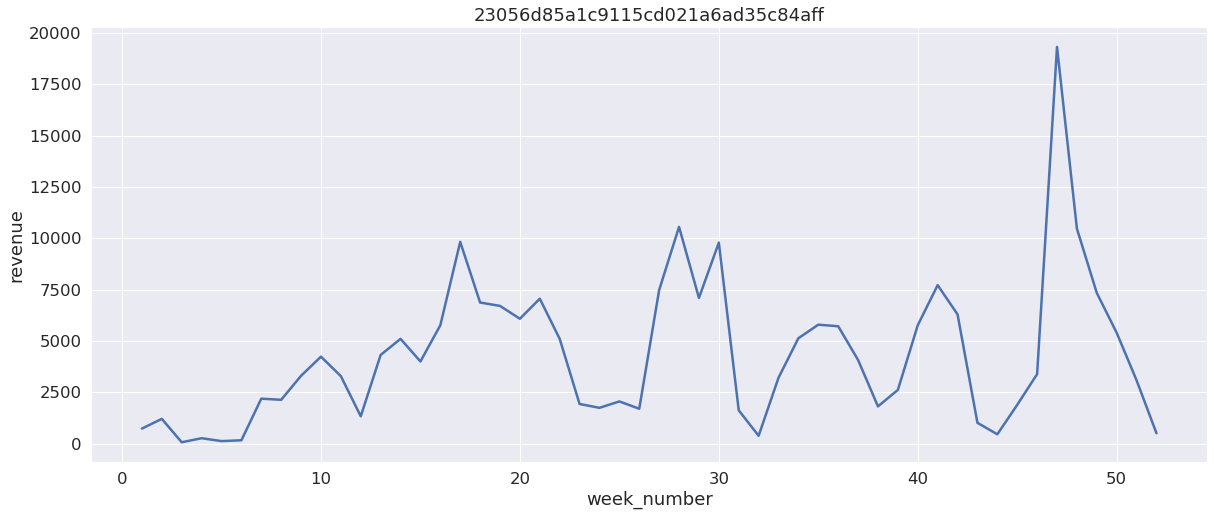

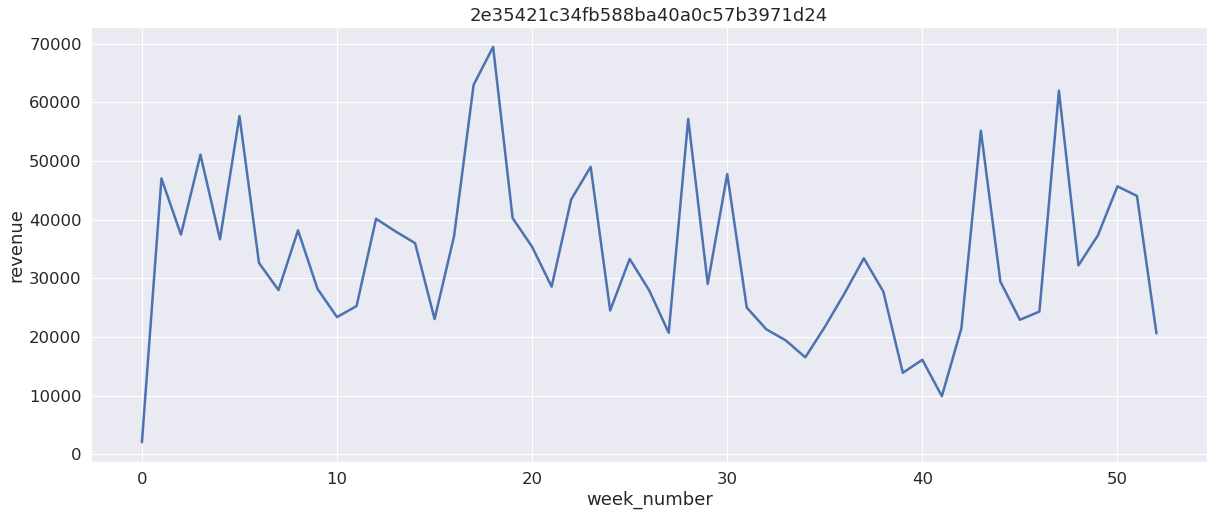

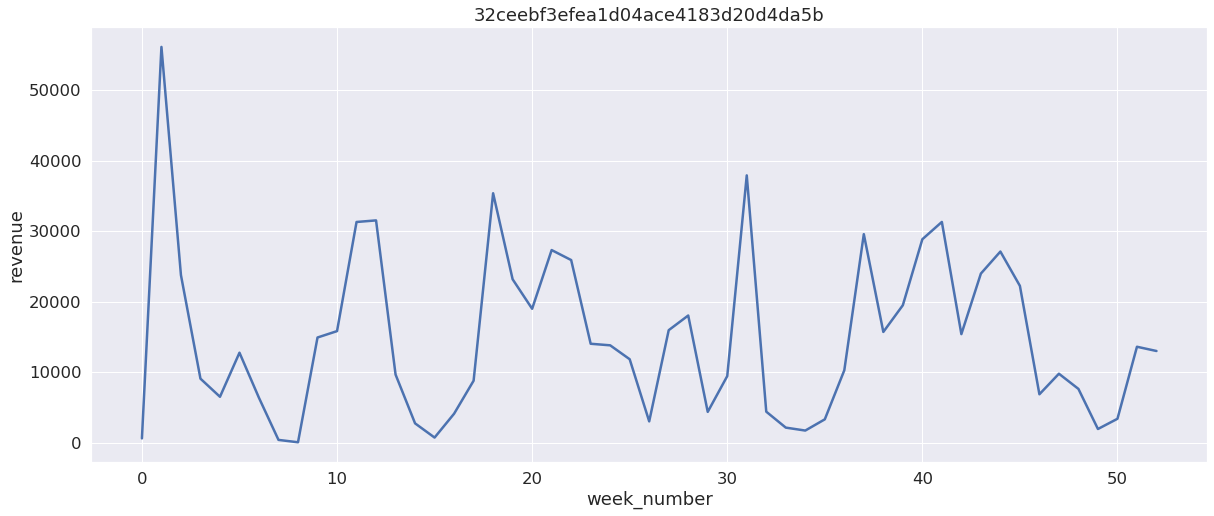

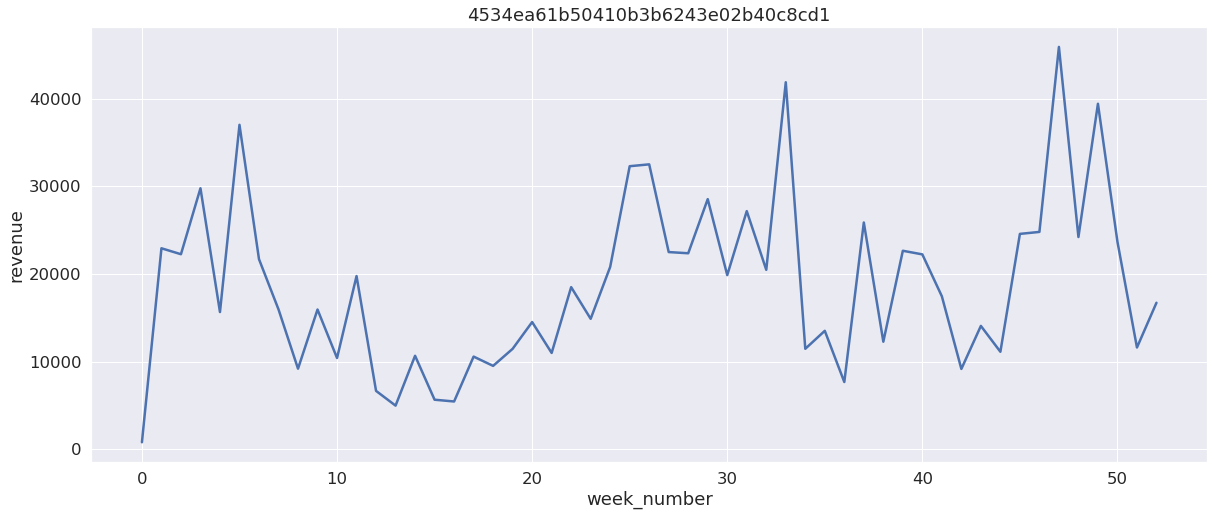

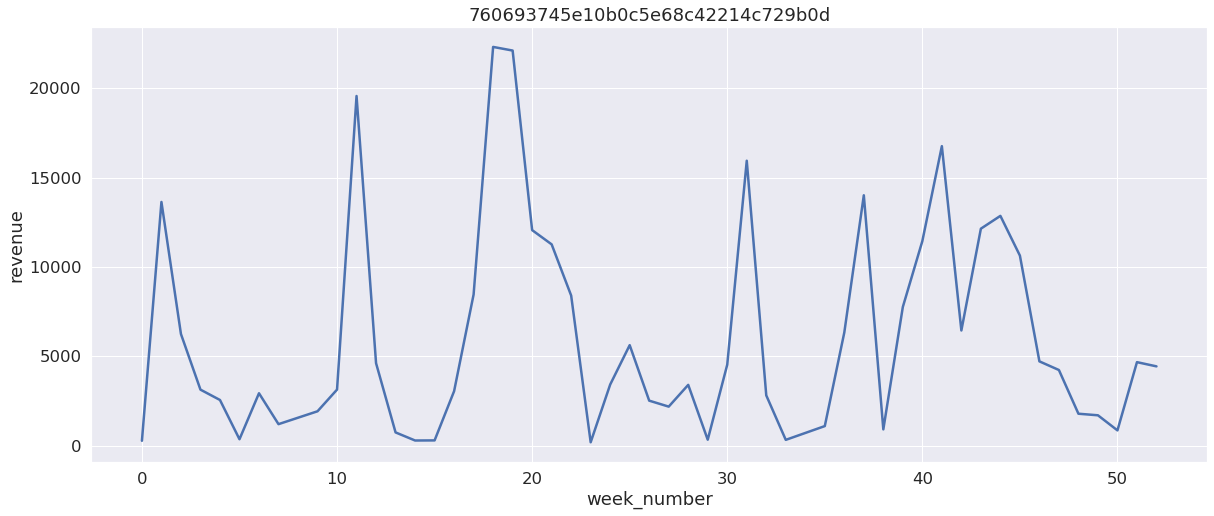

In [17]:
for prod in selected_products: 
    df = df_filtered_sales[df_filtered_sales.code == prod]
    ax = plot_season_sales(df,'revenue', base_col='week_number')
    ax.set_title(prod)
    plt.show()

## Revenue 
* 345 peas around jan, april, early may, august, september, oct, november, december. Very non-monotonic curve.  
* 32c peas around jan, april, early may, june, august, oct, november, december. Very non-monotonic curve.  
* 2e3 a decrease in sales by weeks 30 to 40. 
* 453 a decrease in sales by weeks 10 to 20 and 30 to 40. 
* 760, high peaks on 10, 20  30 and 40. 
* 230 peaks on 20, 25 to 30 35, 40 and around 45.

## Price sensibility

In [18]:
def plot_price_sensibility(df, target_col, base_col='month', title=''):
    df = df[[base_col, target_col, 'quantity']].groupby(base_col).agg({target_col:'mean', 'quantity':'sum'}).reset_index()    
    fig, ax = plt.subplots()
    sns.lineplot(x=df[base_col], y=df[target_col], ax=ax, color='red')
    ax2 = ax.twinx()
    sns.lineplot(x=df[base_col], y=df['quantity'], ax=ax2)
    sns.despine(ax=ax, right=True, left=True)
    sns.despine(ax=ax2, left=True, right=False)
    ax2.spines['right'].set_color('white')

    ax.set_title(title)

    

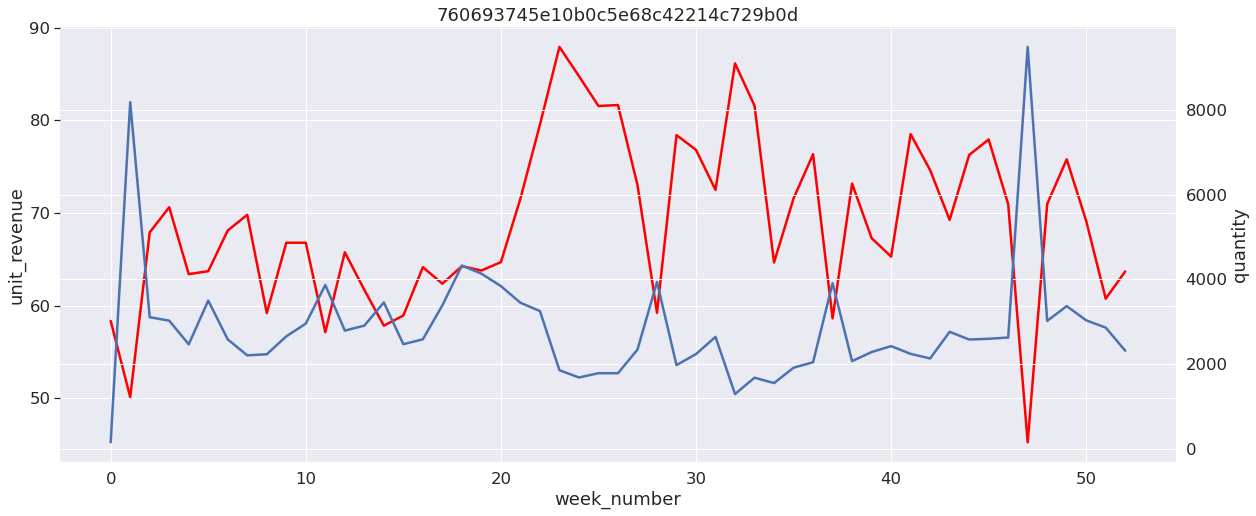

In [19]:
plot_price_sensibility(df_sales,'unit_revenue', base_col='week_number', title=prod)
plt.show()

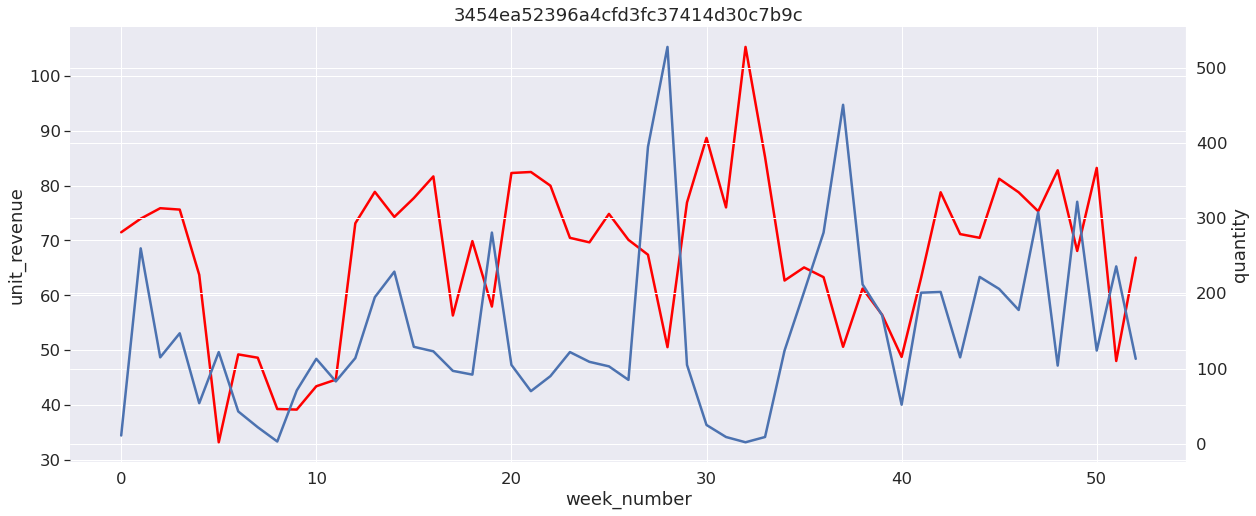

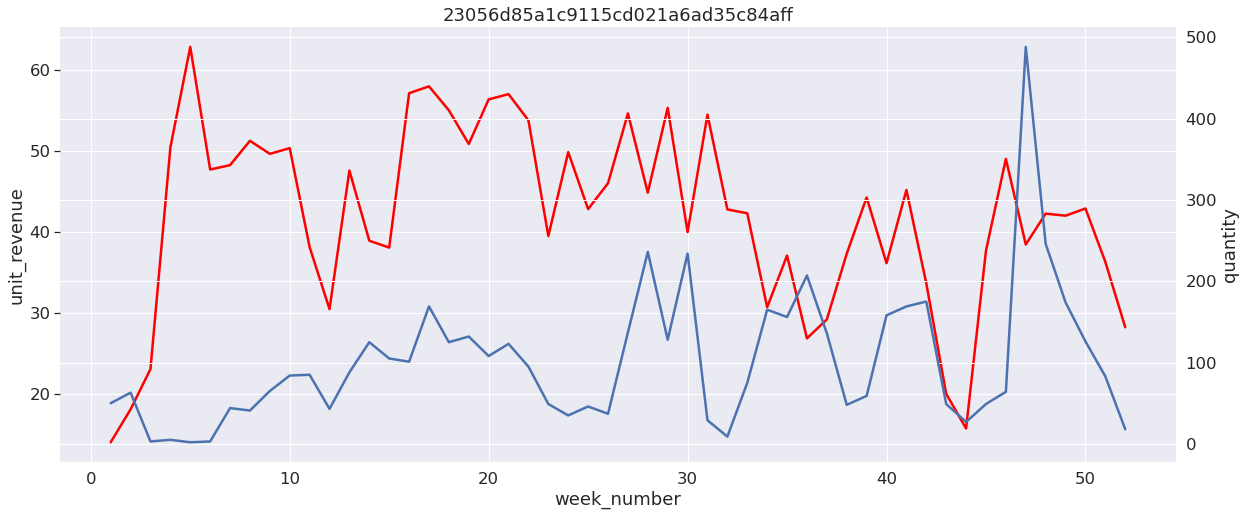

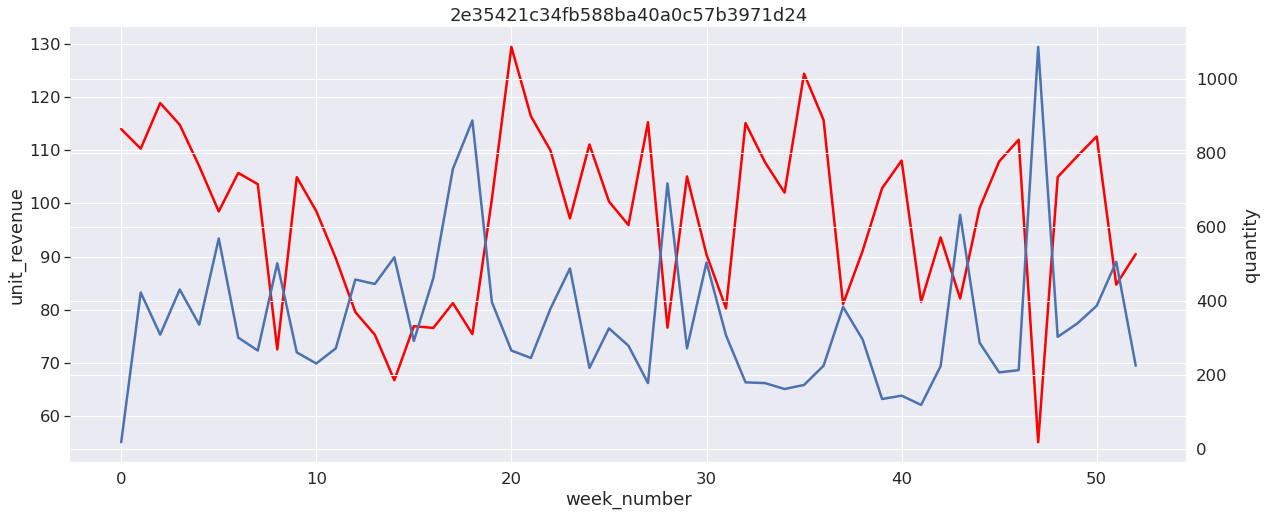

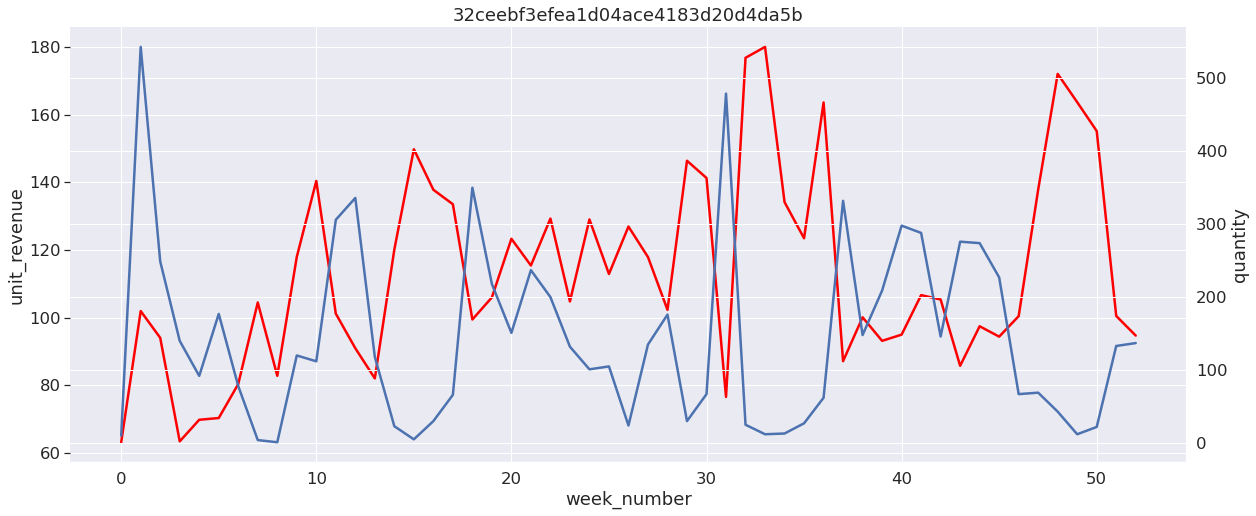

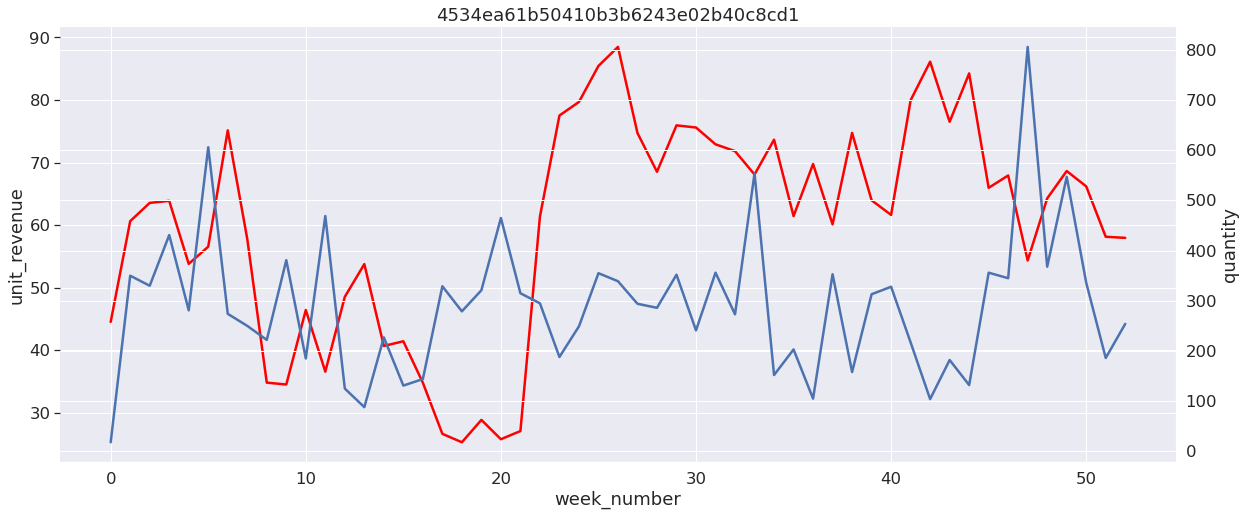

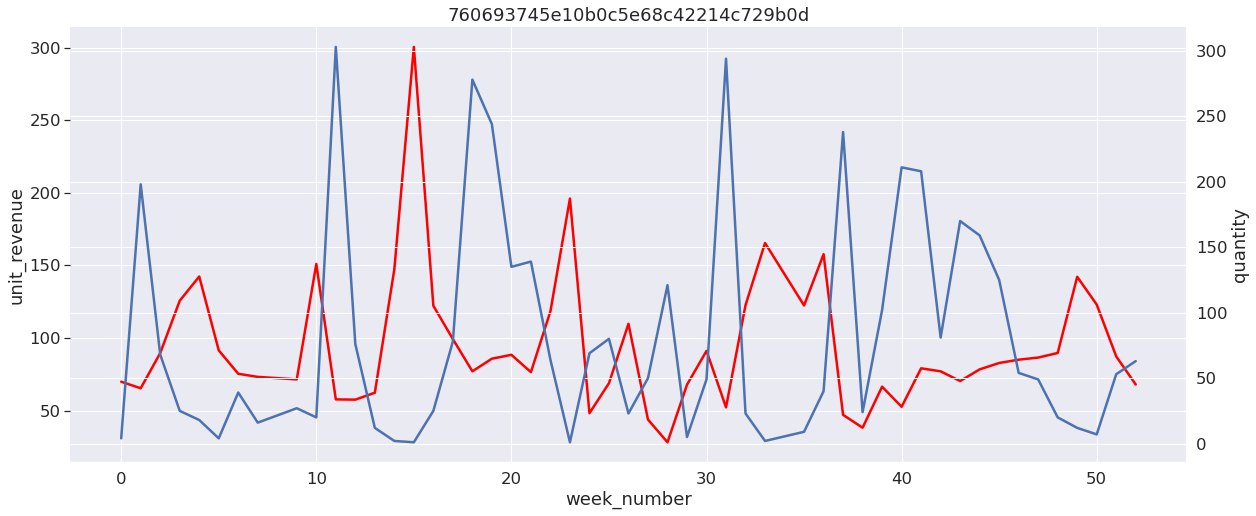

In [20]:
for prod in selected_products: 
    df = df_filtered_sales[df_filtered_sales.code == prod]
    plot_price_sensibility(df,'unit_revenue', base_col='week_number', title=prod)
    plt.show()

* The price tends to have an inverse proportion of the sales volume .